In [9]:
from datasets.outdoor_buildings import OutdoorBuildingDataset
from torch.utils.data import DataLoader
import numpy as np 
import torch 
import skimage
import cv2
import matplotlib.pyplot as plt

In [53]:
DATAPATH = './data/outdoor/cities_dataset'
DET_PATH = './data/outdoor/det_final'
def collate_fn(batch):
    # your batching logic here
    return batch

train_dataset = OutdoorBuildingDataset(DATAPATH, DET_PATH, phase='train')
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=False, num_workers=0,
                                collate_fn=collate_fn)

In [54]:
def process_image(img):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    # img = skimage.img_as_float(img)
    img = img.transpose((2, 1, 0))
    print(img.shape)
    img = (img - np.array(mean)[:, np.newaxis, np.newaxis]) / np.array(std)[:, np.newaxis, np.newaxis]
    img = torch.Tensor(img).cuda()
    img = img.unsqueeze(0)
    return img

In [ ]:
for i, item in enumerate(train_dataloader):
    # print(item[0]['annot'])
    # print(item[0]['image'])
    # print(item[0]['img'])
    annot = item[0]['annot']
    img = item[i]['img']
    img = img.transpose(1, 2, 0)
    img = (img * 255).astype(np.uint8)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    if i==10:
        break

# test the label file 

In [5]:
import numpy as np

annot = np.load('./data/outdoor/cities_dataset/annot/1548203615.09.npy', allow_pickle=True, encoding='latin1').tolist()
corners = np.array(list(annot.keys()))[:, [1, 0]]
positive_pixels = np.array(list(annot.keys())).round()
# Do something with the data


In [15]:
def convert_annot(annot):
    corners = np.array(list(annot.keys()))
    corners_mapping = {tuple(c): idx for idx, c in enumerate(corners)}
    edges = set()
    for corner, connections in annot.items():
        idx_c = corners_mapping[tuple(corner)]
        for other_c in connections:
            idx_other_c = corners_mapping[tuple(other_c)]
            if (idx_c, idx_other_c) not in edges and (idx_other_c, idx_c) not in edges:
                edges.add((idx_c, idx_other_c))
    edges = np.array(list(edges))
    gt_data = {
        'corners': corners,
        'edges': edges
    }
    return gt_data

In [17]:
delabel = convert_annot(annot)

In [34]:
annot

{(57.53400878332178, 218.4483120489388): [array([223.73135069, 111.33657013]),
  array([ 19.7196297 , 157.87837741])],
 (216.28410795656356, 59.63796246086333): [array([201.05796417,  37.55168795]),
  array([210.92985959,  63.48632847])],
 (236.28037030164614,
  103.13787732327059): [array([210.92985959,  63.48632847]), array([223.73135069, 111.33657013])],
 (201.0579641657133, 37.55168795106123): [array([184.15861776,  49.43142651]),
  array([216.28410796,  59.63796246])],
 (199.37524192691384, 72.15920858829757): [array([210.92985959,  63.48632847]),
  array([223.73135069, 111.33657013]),
  array([184.15861776,  49.43142651])],
 (184.1586177604839, 49.4314265131503): [array([ 19.7196297 , 157.87837741]),
  array([201.05796417,  37.55168795]),
  array([199.37524193,  72.15920859])],
 (210.92985959054928, 63.48632847393705): [array([216.28410796,  59.63796246]),
  array([199.37524193,  72.15920859]),
  array([236.2803703 , 103.13787732])],
 (223.73135069380302,
  111.33657013372749): [

In [22]:
delabel

{'corners': array([[ 57.53400878, 218.44831205],
        [216.28410796,  59.63796246],
        [236.2803703 , 103.13787732],
        [201.05796417,  37.55168795],
        [199.37524193,  72.15920859],
        [184.15861776,  49.43142651],
        [210.92985959,  63.48632847],
        [223.73135069, 111.33657013],
        [ 19.7196297 , 157.87837741]]),
 'edges': array([[0, 7],
        [2, 7],
        [5, 8],
        [4, 6],
        [4, 5],
        [2, 6],
        [1, 6],
        [0, 8],
        [1, 3],
        [4, 7],
        [3, 5]])}

In [49]:
annot

{(57.53400878332178, 218.4483120489388): [array([223.73135069, 111.33657013]),
  array([ 19.7196297 , 157.87837741])],
 (216.28410795656356, 59.63796246086333): [array([201.05796417,  37.55168795]),
  array([210.92985959,  63.48632847])],
 (236.28037030164614,
  103.13787732327059): [array([210.92985959,  63.48632847]), array([223.73135069, 111.33657013])],
 (201.0579641657133, 37.55168795106123): [array([184.15861776,  49.43142651]),
  array([216.28410796,  59.63796246])],
 (199.37524192691384, 72.15920858829757): [array([210.92985959,  63.48632847]),
  array([223.73135069, 111.33657013]),
  array([184.15861776,  49.43142651])],
 (184.1586177604839, 49.4314265131503): [array([ 19.7196297 , 157.87837741]),
  array([201.05796417,  37.55168795]),
  array([199.37524193,  72.15920859])],
 (210.92985959054928, 63.48632847393705): [array([216.28410796,  59.63796246]),
  array([199.37524193,  72.15920859]),
  array([236.2803703 , 103.13787732])],
 (223.73135069380302,
  111.33657013372749): [

In [7]:
corners

array([[218.44831205,  57.53400878],
       [ 59.63796246, 216.28410796],
       [103.13787732, 236.2803703 ],
       [ 37.55168795, 201.05796417],
       [ 72.15920859, 199.37524193],
       [ 49.43142651, 184.15861776],
       [ 63.48632847, 210.92985959],
       [111.33657013, 223.73135069],
       [157.87837741,  19.7196297 ]])

In [6]:
positive_pixels

array([[ 58., 218.],
       [216.,  60.],
       [236., 103.],
       [201.,  38.],
       [199.,  72.],
       [184.,  49.],
       [211.,  63.],
       [224., 111.],
       [ 20., 158.]])

In [10]:
img = cv2.imread("./data/outdoor/cities_dataset/rgb/1548203615.09.jpg")
for point in positive_pixels:
    cv2.circle(img,(int(point[0]), int(point[1])), 1, (0,0,255), -1)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
def visualize_cond_generation(positive_pixels, confs, image, save_path, gt_corners=None, prec=None, recall=None,
                              image_masks=None, edges=None, edge_confs=None):
    image = image.copy()  # get a new copy of the original image
    if confs is not None:
        viz_confs = confs

    if edges is not None:
        preds = positive_pixels.astype(int)
        c_degrees = dict()
        for edge_i, edge_pair in enumerate(edges):
            # conf = (edge_confs[edge_i] * 2) - 1
            cv2.line(image, tuple(preds[edge_pair[0]]), tuple(preds[edge_pair[1]]), (255, 255 , 0), 2)
            c_degrees[edge_pair[0]] = c_degrees.setdefault(edge_pair[0], 0) + 1
            c_degrees[edge_pair[1]] = c_degrees.setdefault(edge_pair[1], 0) + 1

    for idx, c in enumerate(positive_pixels):
        if edges is not None and idx not in c_degrees:
            continue
        if confs is None:
            cv2.circle(image, (int(c[0]), int(c[1])), 3, (0, 0, 255), -1)
            cv2.putText(image, f"{idx}", (int(c[0]), int(c[1])),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 0, 255), 1, cv2.LINE_AA)
            print(f"toa do {idx}",(int(c[0]), int(c[1])))
        else:
            cv2.circle(image, (int(c[0]), int(c[1])), 3, (0, 0, 255 * viz_confs[idx]), -1)
        # if edges is not None:
        #    cv2.putText(image, '{}'.format(c_degrees[idx]), (int(c[0]), int(c[1] - 5)), cv2.FONT_HERSHEY_SIMPLEX,
        #                0.5, (255, 0, 0), 1, cv2.LINE_AA)

    if gt_corners is not None:
        for c in gt_corners:
            cv2.circle(image, (int(c[0]), int(c[1])), 3, (0, 255, 0), -1)

    if image_masks is not None:
        mask_ids = np.where(image_masks == 1)[0]
        for mask_id in mask_ids:
            y_idx = mask_id // 64
            x_idx = (mask_id - y_idx * 64)
            x_coord = x_idx * 4
            y_coord = y_idx * 4
            cv2.rectangle(image, (x_coord, y_coord), (x_coord + 3, y_coord + 3), (127, 127, 0), thickness=-1)

    # if confs is not None:
    #    cv2.putText(image, 'max conf: {:.3f}'.format(confs.max()), (20, 20), cv2.FONT_HERSHEY_SIMPLEX,
    #                0.5, (255, 255, 0), 1, cv2.LINE_AA)
    if prec is not None:
        if isinstance(prec, tuple):
            cv2.putText(image, 'edge p={:.2f}, edge r={:.2f}'.format(prec[0], recall[0]), (20, 20),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (255, 255, 0), 1, cv2.LINE_AA)
            cv2.putText(image, 'region p={:.2f}, region r={:.2f}'.format(prec[1], recall[1]), (20, 40),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (255, 255, 0), 1, cv2.LINE_AA)
        else:
            cv2.putText(image, 'prec={:.2f}, recall={:.2f}'.format(prec, recall), (20, 20), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (255, 255, 0), 1, cv2.LINE_AA)
    # cv2.imwrite(save_path, image)
    return image


toa do 0 (58, 218)
toa do 1 (216, 60)
toa do 2 (236, 103)
toa do 3 (201, 38)
toa do 4 (199, 72)
toa do 5 (184, 49)
toa do 6 (211, 63)
toa do 7 (224, 111)
toa do 8 (20, 158)


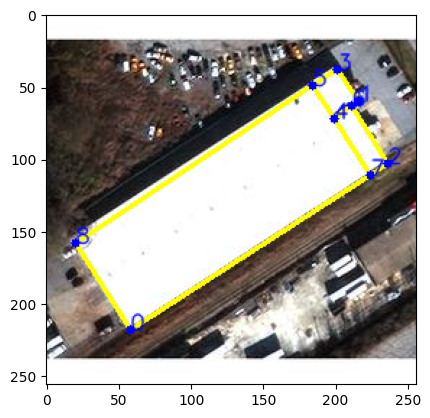

In [47]:
test = visualize_cond_generation(positive_pixels, None, img, None, gt_corners=None, image_masks=None, edges=delabel['edges'], edge_confs=None)
# cv2.imshow('image', test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(test)
plt.show()

In [24]:
positive_pixels

array([[ 58., 218.],
       [216.,  60.],
       [236., 103.],
       [201.,  38.],
       [199.,  72.],
       [184.,  49.],
       [211.,  63.],
       [224., 111.],
       [ 20., 158.]])

In [32]:
edges=delabel['edges']
if edges is not None:
    preds = positive_pixels.astype(int)
    c_degrees = dict()
    for edge_i, edge_pair in enumerate(edges):
        print(tuple(preds[edge_pair[0]]))
        print(tuple(preds[edge_pair[1]]))

        break
        # conf = (edge_confs[edge_i] * 2) - 1
        cv2.line(img, tuple(preds[edge_pair[0]]), tuple(preds[edge_pair[1]]), (255, 255 , 0), 2)
        c_degrees[edge_pair[0]] = c_degrees.setdefault(edge_pair[0], 0) + 1
        c_degrees[edge_pair[1]] = c_degrees.setdefault(edge_pair[1], 0) + 1
    
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(58, 218)
(224, 111)


# Convert label

In [ ]:
import cv2
import os
import scipy.io as sio
import numpy as np

images = './data_train/thong/rgb/'
labels = './data_train/thong/annot/'
extensions = ('.jpg' , '.jpeg', '.PNG' ,'.png')

points_new = {}  # Initialize the dictionary outside the loop

for filename in os.listdir(images):
    # Check if the file ends with the specified extensions
    if filename.endswith(extensions):
        head, extension = os.path.splitext(filename)
        img_path = os.path.join(images, filename)
        mat_path = os.path.join(images, head + '.mat')

        with open(img_path, 'rb') as img_file:
            img = cv2.imread(img_file)

        lines = sio.loadmat(mat_path)['lines']

        for p1, p2 in lines:
            p1 = tuple(p1)
            p2 = tuple(p2)
            if p1 not in points_new:
                points_new[p1] = []
            if p2 not in points_new:
                points_new[p2] = []
            points_new[p1].append(list(p2))
            points_new[p2].append(list(p1))

        # Save points_new to npy file
        np.save(os.path.join(labels, head + '.npy'), points_new)


: 